## Question 4 Appendix: Calculations

***

### For the following questions use at least 25 year's worth of data from any reasonable combination of atmosphere reanalyses, ocean state estimates, ocean hydrography products, or dedicated air-sea heat flux products. Show all work.

***

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import cmocean
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

#### Datasets used:

ECCO Ocean and Sea-Ice Surface Heat Fluxes - Monthly Mean 0.5 Degree (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_HEAT_FLUX_05DEG_MONTHLY_V4R4

ECCO Ocean Temperature and Salinity - Monthly Mean 0.5 Degree (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_TEMP_SALINITY_05DEG_MONTHLY_V4R4

ECCO Geometry Parameters for the 0.5 degree Lat-Lon Model Grid (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_GEOMETRY_05DEG_V4R4?ids=&values=&search=ecco%20grid%20lat&provider=POCLOUD

*Time Span of 26 years: 1992-Jan-01 to 2018-Jan-01*

#### Import ECCO data

Open and combine all NetCDF files together using the `xarray.open_mfdataset` function:

In [2]:
# list of shortnames for three datasets: ECCO geometry (1 file), heat fluxes, and temperature/salinity

ecco_geometry = "ECCO_L4_GEOMETRY_05DEG_V4R4"
ecco_heat = "ECCO_L4_HEAT_FLUX_05DEG_MONTHLY_V4R4"
ecco_temp_salt = "ECCO_L4_TEMP_SALINITY_05DEG_MONTHLY_V4R4"

In [3]:
# define root directory for location of all downloaded NetCDF files
root_dir = Path('../data/ECCO_V4r4_PODAAC')

# define the directory where the files specific to desired dataset are stored
nc_heat_dir = root_dir / "ECCO_L4_HEAT_FLUX_05DEG_MONTHLY_V4R4"
nc_temp_salt_dir = root_dir / "ECCO_L4_TEMP_SALINITY_05DEG_MONTHLY_V4R4"

In [4]:
# get all files in each folder for import
heat_nc_files = list(nc_heat_dir.glob('*nc'))
temp_salt_nc_files = list(nc_temp_salt_dir.glob('*nc'))

In [5]:
# import 26 years of ecco temperature data
temp_salt_ds = xr.open_mfdataset(temp_salt_nc_files, parallel=True, data_vars='minimal',\
                                coords='minimal', compat='override')

temp_salt_ds

<xarray.Dataset>
Dimensions:         (time: 312, Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T...
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (latitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    Z_bnds          (Z, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    THETA           (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 50, 360, 720), meta=np.ndarray>
    SALT            (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 50, 360, 720), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            7e05edde-4159-11eb-9ce1-0cc47a3f47f1

In [6]:
# import 26 years of ecco heat flux data
heat_ds = xr.open_mfdataset(heat_nc_files, parallel=True, data_vars='minimal',\
                            coords='minimal', compat='override')

heat_ds

<xarray.Dataset>
Dimensions:         (time: 312, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T...
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (latitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    EXFhl           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFhs           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFlwdn         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFswdn         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFqnet         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    oceQnet         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    SIatmQnt        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    TFLUX           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFswnet        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFlwnet        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    oceQsw          (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    SIaaflux        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            1992-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Ocean and Sea-Ice Surface Heat Fluxes ...
    uuid:                         73ea7d5c-4158-11eb-8d61-0cc47a3f812d

In [7]:
# import the geometry data file that provides area and volume information for grid cells
geometry_ds = xr.open_dataset('../data/ECCO_V4r4_PODAAC/ECCO_L4_GEOMETRY_05DEG_V4R4/GRID_GEOMETRY_ECCO_V4r4_latlon_0p50deg.nc')
geometry_ds

<xarray.Dataset>
Dimensions:         (Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    latitude_bnds   (latitude, nv) float32 ...
    longitude_bnds  (longitude, nv) float32 ...
    Z_bnds          (Z, nv) float32 ...
Dimensions without coordinates: nv
Data variables:
    hFacC           (Z, latitude, longitude) float64 ...
    Depth           (latitude, longitude) float64 ...
    area            (latitude, longitude) float64 ...
    drF             (Z) float32 ...
    maskC           (Z, latitude, longitude) bool ...
Attributes: (12/57)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the 0.5 deg...
    uuid:                            b4795c62-86e5-11eb-9c5f-f8f21e2ee3e0

### 3a. Calculate the monthly and annual climatologies of net air-sea heat flux [Watts per square meter] over the subpolar gyre.

#### Select subpolar gyre region for calculations

*Note*: Since the greatest air-sea heat fluxes and deep convection over the subpolar gyre occur in the western Labrador Sea (Marshall et al., 1998; Våge et al., 2009), I am selecting grid cells in the western Labrador Sea.

In [8]:
# isolate data for the western Labrador Sea
heat_Lab = heat_ds.sel(longitude=slice(-60,-51), latitude=slice(57,62))
temp_salt_Lab = temp_salt_ds.sel(longitude=slice(-60,-51), latitude=slice(57,62))

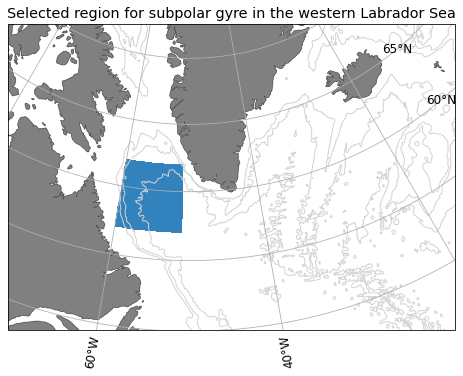

In [9]:
# Plot region selected for analysis
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=[8,10])

ax1=plt.subplot(1,1,1, projection=ccrs.NorthPolarStereo(central_longitude=-50))
ax1.set_extent([-70, -20, 50, 70], ccrs.PlateCarree()) # Limit the map extent
ax1.add_feature(cfeature.COASTLINE, edgecolor='k',linewidth=0.2)
ax1.add_feature(cfeature.LAND, color='gray')
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax1.add_feature(bathym, facecolor='none', edgecolor='lightgray')
bathym = cfeature.NaturalEarthFeature(name='bathymetry_I_2000', scale='10m', category='physical')
ax1.add_feature(bathym, facecolor='none', edgecolor='lightgray')
bathym = cfeature.NaturalEarthFeature(name='bathymetry_H_3000', scale='10m', category='physical')
ax1.add_feature(bathym, facecolor='none', edgecolor='lightgray', label=True)

gl = ax1.gridlines(draw_labels=True)

gl.top_labels=False

data_cartopy_crs = ccrs.PlateCarree()
heat_Lab.EXFhl.isel(time=100).plot(ax=ax1,transform=ccrs.PlateCarree(),cmap='tab20c',vmin= -1, vmax=1,add_colorbar=False)
                         
ax1.set_title("Selected region for subpolar gyre in the western Labrador Sea");

#### Calculate and plot monthly mean air-sea heat flux over 26 year time series

Variables in ECCO heat dataset to consider:
- `EXFqnet`: Open ocean net air-sea heat flux. Net air-sea heat flux (turbulent and radiative) per unit area of open water (not covered by sea-ice). Note: net upward heat flux over open water, calculated as EXFlwnet+EXFswnet-EXFlh-EXFhs.

- `oceQnet`: Net heat flux into the ocean surface. Net heat flux into the ocean surface from all processes: air-sea turbulent and radiative fluxes and turbulent and conductive fluxes between the ocean and sea-ice and snow. Note: oceQnet does not include the change in ocean heat content due to changing ocean ocean mass (oceFWflx). Mass fluxes from evaporation, precipitation, and runoff (EXFempmr) happen at the same temperature as the ocean surface temperature. Consequently, EmPmR does not change ocean surface temperature. Conversely, mass fluxes due to sea-ice thickening/thinning and snow melt in the model are assumed to happen at a fixed 0C. Consequently, mass fluxes due to phase changes between seawater and sea-ice and snow induce a heat flux when the ocean surface temperaure is not 0C. The variable TFLUX does include the change in ocean heat content due to changing ocean mass.

- `SIatmQnt`: Net upward heat flux to the atmosphere. Net upward heat flux to the atmosphere across open water and sea-ice or snow surfaces. Note: nonzero SIatmQnt may not be associated with a change in ocean potential temperature due to sea-ice growth or melting. To calculate total ocean heat content changes use the variable TFLUX which also accounts for changing ocean mass (e.g. oceFWflx).

- `TFLUX`: Rate of change of ocean heat content per m2 accounting for mass fluxes. The rate of change of ocean heat content due to heat fluxes across the liquid surface and the addition or removal of mass. . Note: the global area integral of TFLUX and geothermal flux (geothermalFlux.bin) matches the time-derivative of ocean heat content (J/s). Unlike oceQnet, TFLUX includes the contribution to the ocean heat content from changing ocean mass (e.g. from oceFWflx).

I am using `SIatmQnt`, as opposed to `EXFqnet`, for my calculations because I want the net heat flux into the atmosphere that considers sea-ice. But, because I'm curious, I am going to plot both in the monthly climatology

In [10]:
# group by month and then take average to get monthly climatology over an annual cycle
Q_net_Lab = heat_Lab.SIatmQnt.groupby("time.month").mean(dim="time")
Q_net_Lab_month = Q_net_Lab.mean(dim=['latitude','longitude'])

Q_net_Lab_ocean = heat_Lab.EXFqnet.groupby("time.month").mean(dim="time")
Q_net_Lab_ocean_month = Q_net_Lab_ocean.mean(dim=['latitude','longitude'])

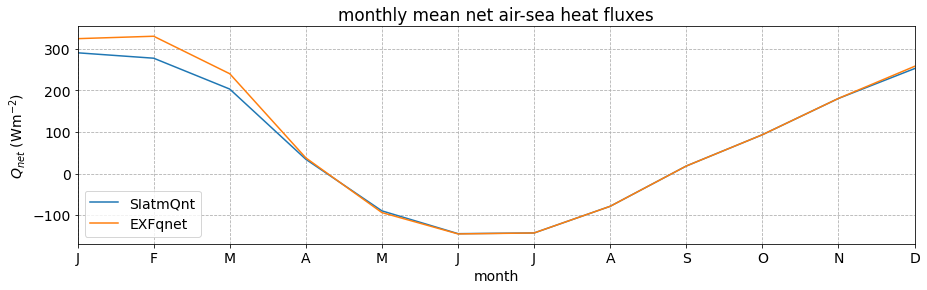

In [11]:
plt.rcParams['font.size'] = '14'
plt.figure(figsize=[15,4])
Q_net_Lab_month.plot(label="SIatmQnt")
Q_net_Lab_ocean_month.plot(label="EXFqnet")

# plt.title("monthly mean air-sea heat flux")
plt.title("")
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)")
plt.legend()
plt.xticks(ticks=list(range(13)[1:]), labels=['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.margins(x=0)

plt.grid(linestyle='--')
plt.title("monthly mean net air-sea heat fluxes");

As expected, the wintertime `EXFqnet` heat flux is slightly greater than `SIatmQnt` because it is not accounting for sea ice that provides a barrier between the atmosphere and ocean, decreasing the net heat flux into the atmosphere.

In [15]:
print(f"The monthly net air-sea heat fluxes (in W m^-2) over the western labrador sea (where maximal heat fluxes in the subpolar gyre are observed) are printed below."
"\nHere, positive fluxes indicate ocean heat loss and atmosphere heat gain.")
print(f"Jan: {round(Q_net_Lab_month.values[0])}")
print(f"Feb: {round(Q_net_Lab_month.values[1])}")
print(f"Mar: {round(Q_net_Lab_month.values[2])}")
print(f"Apr: {round(Q_net_Lab_month.values[3])}")
print(f"May: {round(Q_net_Lab_month.values[4])}")
print(f"Jun: {round(Q_net_Lab_month.values[5])}")
print(f"Jul: {round(Q_net_Lab_month.values[6])}")
print(f"Aug: {round(Q_net_Lab_month.values[7])}")
print(f"Sep: {round(Q_net_Lab_month.values[8])}")
print(f"Oct: {round(Q_net_Lab_month.values[9])}")
print(f"Nov: {round(Q_net_Lab_month.values[10])}")
print(f"Dec: {round(Q_net_Lab_month.values[11])}");

The monthly net air-sea heat fluxes (in W m^-2) over the western labrador sea (where maximal heat fluxes in the subpolar gyre are observed) are printed below.
Here, positive fluxes indicate ocean heat loss and atmosphere heat gain.
Jan: 290
Feb: 277
Mar: 203
Apr: 34
May: -90
Jun: -145
Jul: -143
Aug: -79
Sep: 18
Oct: 93
Nov: 180
Dec: 252


What we can see from the figure and the calculated means above is the greatest ocean heat loss (= positive net heat flux in the atmosphere) in the subpolar gyre occurs in winter (Dec, Jan, Feb, Mar). This is due to cold winter air temperatures and warm water (from subtropical origins) that create considerable ocean-atmosphere heat flux divergences. Heat is lost from the ocean, creating denser surface waters that sink (formation of Labrador Sea indermediate waters that flow into the upper arm of the AMOC).

Conversely, heat is gained in the ocean during summer months (May-Aug), peaking in June/July (= negative net heat flux in the atmosphere). The relative summer heat flux (gain) is smaller than the winter heat flux (loss).

In [13]:
# calculate annual net heat flux over Labrador Sea
Q_net_Lab_annual = heat_Lab.SIatmQnt.mean().values.round(2)
print(Q_net_Lab_annual)
print(f"The annual mean net air-sea heat flux over the western labrador sea is 74.35 W m^-2")

74.35
The annual mean net air-sea heat flux over the western labrador sea is 74.35 W m^-2


The annual mean net air-sea heat flux is positive, indicating a net heat *loss* in the subpolar gyre

#### For a visual representation of monthly net heat flux:

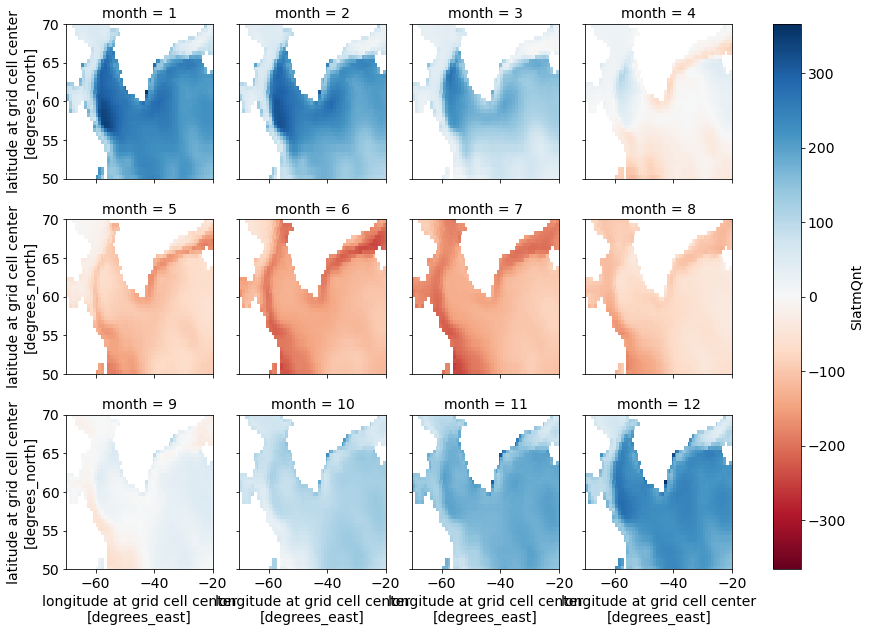

In [17]:
heat_ds.sel(latitude=slice(50,70), longitude=slice(-70,-20)).groupby("time.month").mean("time").SIatmQnt.plot(x="longitude",y="latitude",col="month",col_wrap=4,cmap='RdBu');

***

### 3b. How have air-sea heat fluxes over the subpolar gyre deviated from these climatologies over the past few decades? Which months exhibit the largest and smallest deviations from climatology?

To answer this question, I will calculate and plot the monthly anomaly climatologies for each year (1992-2017) and see which months deviate the most.

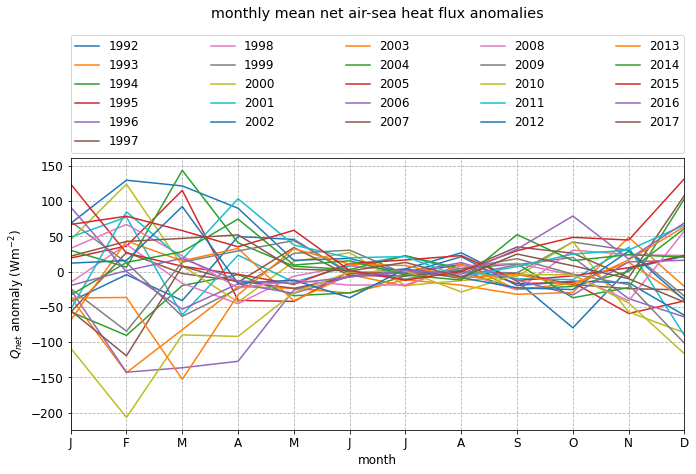

In [148]:
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=26).strftime('%Y').tolist()

# first take average over region
Q_net_Lab_mean = heat_Lab.SIatmQnt.mean(dim=['latitude','longitude'])

# loop to obtain each year's anomaly and plot
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'
plt.margins(x=0)

# take monthly mean for each year and subtract monthly climatology for 1992-2017
for yr in yrs:
    Q_net_Lab_yr = Q_net_Lab_mean.sel(time=yr).groupby("time.month").mean()
    anomaly = Q_net_Lab_yr - Q_net_Lab_month # compute anomaly
    anomaly.plot(label=yr)
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=5, mode="expand", borderaxespad=0.)
plt.ylabel("$Q_{net}$ anomaly (Wm$^{-2}$)")
plt.xticks(ticks=list(range(13)[1:]), labels=['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.grid(linestyle='--')
plt.title("monthly mean net air-sea heat flux anomalies",pad=140);

Clearly, the winter months (DJFM) have the largest deviations from the climatology (calculated from base period 1992-2017) with heat flux anomalies ranging from +/- 150 Wm^-2. The smaller anomalies observed in the summer months (JJAS) indicate this period has the least variation about the mean. Spring (Apr/May) and fall (Oct/Nov) months are moderately variable.

Put simply, we can conclude that the interannual varaibility in annual net air-sea heat fluxes observed in the subpolar gyre are due to variations in the winter months.

##### Now, I can also look at annual net air-sea heat flux anomalies to see which years, in particular, had the largest deviations.

In [14]:
# calculate annual mean heat flux over Labrador Sea for each year 1992-2017
Q_net_Lab_yr = heat_Lab.SIatmQnt.groupby("time.year").mean(dim=['time','latitude','longitude'])

# subtract annual mean heat flux for 1992-2017 from each year's annual mean
Q_net_Lab_yr_anomaly = Q_net_Lab_yr - Q_net_Lab_annual # Q_net_Lab_annual was calculated above ~ 74 Wm^-2

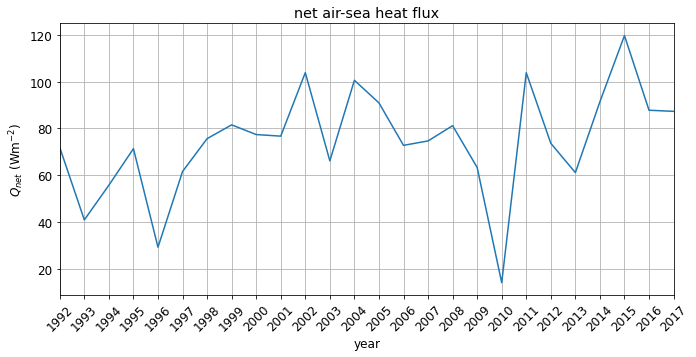

In [22]:
# plot net air-sea heat flux (aboslute values)
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

Q_net_Lab_yr.plot()
plt.margins(x=0)
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)")
plt.title("net air-sea heat flux")
plt.xticks(ticks=Q_net_Lab_yr_anomaly.year, labels=yrs, rotation=45)

plt.grid();

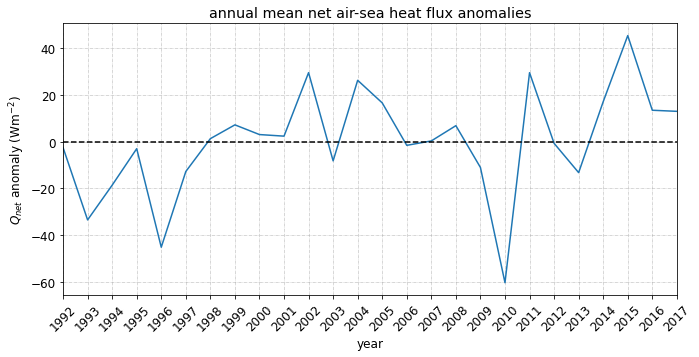

In [19]:
# plot anomalies
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=26).strftime('%Y').tolist()

plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

Q_net_Lab_yr_anomaly.plot()

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("$Q_{net}$ anomaly (Wm$^{-2}$)")
plt.xticks(ticks=Q_net_Lab_yr_anomaly.year, labels=yrs, rotation=45)
plt.axhline(y=0, color='k', linestyle='--')

plt.title("annual mean net air-sea heat flux anomalies");

Annual net heat flux can deviate considerably from the mean (up to +40 or -60 Wm^-2). 2010 had the largest deviation being 60 Wm^-2 lower than the mean, which means that year had an anomalously low annual air-sea heat flux. Maybe atmospheric temperatures were high that year (= lower ocean-atmosphere heat divergence) and/or decreased winds led to lower heat fluxes. 

I am surprised 2007-2008 does not have a larger positive anomaly when comparing it to results from Våge et al. (2009) that documented large positive heat flux anomalies during that winter.

#### Calculate annual winter (NDJFM) net heat flux over the Labrador Sea

In [23]:
# loop through each winter season and take the mean
years = list(range(1992, 2017, 1))
months = list(range(1,13,1))
months *= 2
winter_heat = pd.DataFrame({"start_year": years})
heat = []

for year in years:
    # subset 2 years of data from which winter months will be isolated
    data_tmp = heat_Lab.SIatmQnt.sel(time=slice(str(year),str(year+1)))
    # change time values to months (numerical)
    data_tmp['time'] = months
    # take winter months and average across them
    tmp = data_tmp.isel(time=data_tmp.time.isin([11,12,1,2,3])).mean(dim=['time','latitude','longitude'])
    # assign to final output
    heat.append(tmp.values)
winter_heat['heat_flux'] = heat
print(winter_heat)

    start_year  heat_flux
0         1992   210.9501
1         1993  206.53302
2         1994  237.04105
3         1995  206.86719
4         1996  191.54181
5         1997  237.66591
6         1998  247.57565
7         1999   245.5509
8         2000  244.83635
9         2001   265.7025
10        2002  261.26935
11        2003  263.17432
12        2004  285.44183
13        2005  266.14935
14        2006  240.73297
15        2007   247.7718
16        2008  232.95955
17        2009  162.44896
18        2010  198.53209
19        2011  266.05768
20        2012  236.86089
21        2013  231.24272
22        2014   283.9493
23        2015   287.4732
24        2016  255.26486


In [24]:
# calculate annual mean WINTER heat flux
heat_avg_winter = winter_heat.heat_flux.mean()
print(f'{round(heat_avg_winter,2)} W m^-2')

240.54 W m^-2


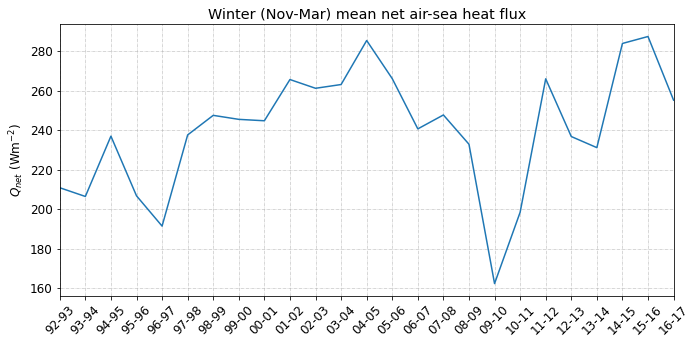

In [25]:
# plot winter mean heat flux
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=25).strftime('%Y').tolist()

plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

plt.plot(winter_heat.start_year,winter_heat.heat_flux)

# ticks
year_span = []
for year in winter_heat.start_year:
    year_span.append(str(year)[-2:]+'-'+str(year+1)[-2:])

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)")
plt.xticks(ticks=winter_heat.start_year, labels=year_span, rotation=45)

plt.title("Winter (Nov-Mar) mean net air-sea heat flux");

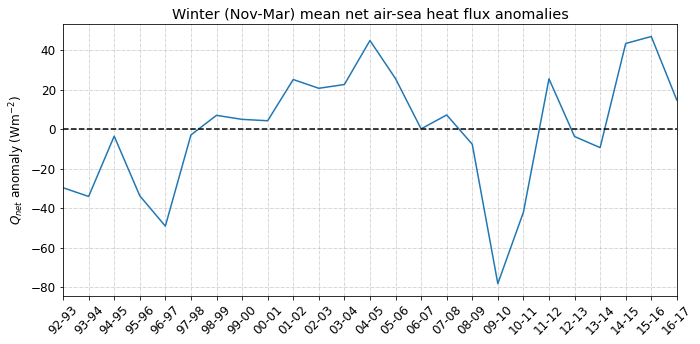

In [26]:
# plot winter mean heat flux anomalies
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=25).strftime('%Y').tolist()

plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

plt.plot(winter_heat.start_year,winter_heat.heat_flux-heat_avg_winter)

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("$Q_{net}$ anomaly (Wm$^{-2}$)")
plt.xticks(ticks=winter_heat.start_year, labels=year_span, rotation=45)
plt.axhline(y=0, color='k', linestyle='--')

plt.title("Winter (Nov-Mar) mean net air-sea heat flux anomalies");

***

### 3c. Compare the observed changes to the annual-mean subpolar ocean temperatures to those predicted by the annual-mean air-sea heat flux anomalies. Estimate how much heat lost by the ocean to the atmosphere each year was resupplied by ocean heat transport. How do variations of annual-mean heat loss to the atmosphere compare with annual-mean heat gained by ocean transport? For this question, consider the upper 2000m of the subpolar gyre.

#### Compare the observed changes to the annual-mean subpolar ocean temperatures to those predicted by the annual-mean air-sea heat flux anomalies

To do this, I will calculate the expected total ocean energy loss calculated from net air-sea winter heat fluxes (`energy_heat_flux`) and the total energy change observed from ocean temperatures (June-June) (`energy_obs_ocean`). The difference between these two values is the energy contribution from ocean transport (`energy_ocean_trans`).

I will use the following equation that relates the change in temperature of a water parcel to the change in energy:

&emsp;$\Delta E = C_p m \Delta T$

where $m$ is the mass of the water and $C_p$ is the specific heat of the sea water at constant pressure.

&emsp;$C_p$ = 3850 $J kg^{−1} °C^{−1}$ <br>
&emsp;$m$ = $\rho v$ <br>
&emsp;$\rho$ = 1025 $kg m^{-2}$

Therefore: <br>

&emsp;$\Delta E = C_p * \rho * v * (T - T_{ref})$

where $E$ is the total energy (in Joules) gained/lost by a water parcel with volume, $v$, and density, $\rho$, for a given temperature change ($T - T_{ref}$)

* Total energy is in Joules; heat flux (rate) is in W m^(-2)
* The specific heat capacity means that ~4,000 joules of energy are required to heat 1.0 kilogram of sea water by 1.0°C 

To do this calculation, we need the geometry ECCO data to obtain area and volume of region: <br>
* variable `drF`: cell_thickness. distance between the upper and lower interfaces of the model grid cell (units: m) <br>
* variable `area`: area of lat-lon grid cell (units: m^2)

In [29]:
# volume of Labrador Sea grid cell down to 2000 meters
grid_cells = geometry_ds.sel(longitude=slice(-60,-51), latitude=slice(57,62), Z=slice(0,-2000))
volume = grid_cells.drF.sum() * grid_cells.area.sum() # depth is ~2000m * area of region
print(volume) # in m^3

<xarray.DataArray ()>
array(5.62803867e+14)


In [33]:
# calculate the observed temperature difference before and after winter season (successive years)
years = list(range(1992, 2017, 1))
months = list(range(1,13,1))
months *= 2 # duplicate list of month names to span 2 years
summer_temp_diff = pd.DataFrame({"start_year": years})
temp = []
temp_diff = []

for year in years:
    # subset observed temperature in June for 2 years and take average over the subpolar gyre (upper 2000m)
    year1 = temp_salt_Lab.THETA.sel(time=str(year)+'-06',Z=slice(0,-2000)).mean(dim=['Z','latitude','longitude'])
    year2 = temp_salt_Lab.THETA.sel(time=str(year+1)+'-06',Z=slice(0,-2000)).mean(dim=['Z','latitude','longitude'])
    
    # take difference between years
    diff = year2.values - year1.values # a negative difference indicates temperature loss over winter season
    
    # assign to final outputs
    if year != 2017:
        temp.append(year1.values)
    else: temp.append(year2.values)
    temp_diff.append(diff)

summer_temp_diff['temp_diff'] = temp_diff
print(summer_temp_diff)

    start_year       temp_diff
0         1992    [-0.4681611]
1         1993     [0.3990569]
2         1994     [0.2051804]
3         1995    [0.33179164]
4         1996    [0.25192428]
5         1997    [0.15963864]
6         1998   [-0.08521056]
7         1999  [-0.080961466]
8         2000    [0.14380217]
9         2001   [-0.10038495]
10        2002    [0.16255832]
11        2003    [0.16503644]
12        2004   [0.022975206]
13        2005  [0.0059816837]
14        2006   [0.041608334]
15        2007   [-0.12126398]
16        2008   [-0.09456873]
17        2009    [0.49754095]
18        2010   [-0.06911659]
19        2011   [-0.21343231]
20        2012  [-0.050949574]
21        2013   [0.051487923]
22        2014   [-0.20749259]
23        2015   [0.091219425]
24        2016   [-0.20853972]


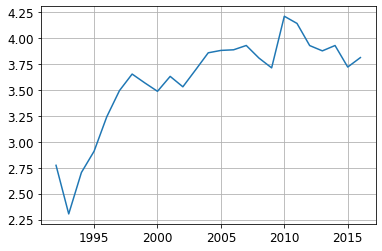

In [34]:
temp = pd.DataFrame(temp)
plt.plot(years, temp[0])
plt.grid();

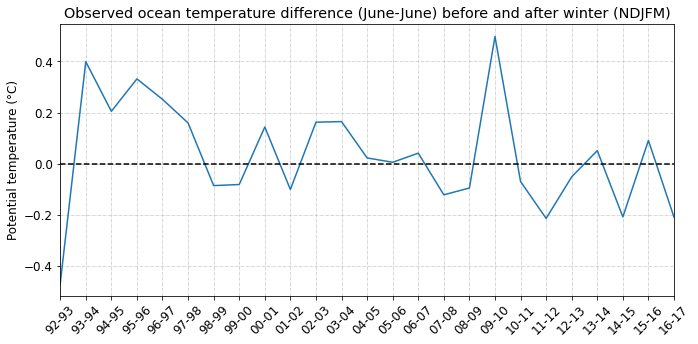

In [52]:
# plot temperature difference before/after winter heat loss
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=25).strftime('%Y').tolist()

plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

plt.plot(summer_temp_diff.start_year,summer_temp_diff.temp_diff)

# ticks
year_span = []
for year in winter_heat.start_year:
    year_span.append(str(year)[-2:]+'-'+str(year+1)[-2:])

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("Potential temperature (°C)")
plt.xticks(ticks=winter_heat.start_year, labels=year_span, rotation=45)
plt.axhline(y=0, color='k', linestyle='--')

plt.title("Observed ocean temperature difference (June-June) before and after winter (NDJFM)");

Calculate predicted temperature change based on winter mean heat flux

In [82]:
# determine total energy in Joules per year in ocean heat loss (winter season)
# Joules = heat flux (W m^(-2)) * Area (m^2) * time (s); 1 W = 1 J/s
energy_heat_flux = winter_heat.heat_flux * grid_cells.area.sum().values * 3.16e7 # 3e7 seconds in 1 year reflecting annual cycle

In [83]:
# now use relationship of energy and temperature to calculate expected delta T
# E = (specific heat)*density*volume*(delta T), so
# delta T = E/((specific heat)*density*volume)

delta_T_exp = energy_heat_flux/(3850*1025*volume.values)

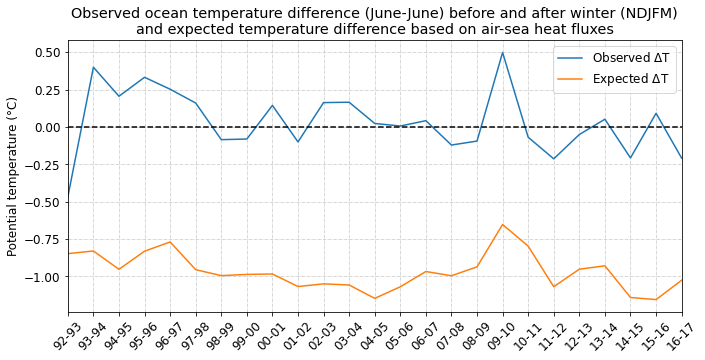

In [88]:
# plot observed temperature difference before/after winter heat loss and expected temp change based on heat fluxes
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=25).strftime('%Y').tolist()

plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

plt.plot(summer_temp_diff.start_year,summer_temp_diff.temp_diff,label="Observed $\Delta$T")
# need to reverse sign of delta_T_exp because STatmQnt is positive for heat gain to atm (heat loss in ocean) which corresponds to decreased ocean temp
plt.plot(summer_temp_diff.start_year,delta_T_exp*(-1),label="Expected $\Delta$T")
plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("Potential temperature (°C)")
plt.xticks(ticks=winter_heat.start_year, labels=year_span, rotation=45)
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()

plt.title("Observed ocean temperature difference (June-June) before and after winter (NDJFM)\nand expected temperature difference based on air-sea heat fluxes");

#### Estimate how much heat lost by the ocean to the atmosphere was resupplied by ocean heat transport

In [54]:
# E = (specific heat)*density*volume*(delta T)
energy_obs_ocean = 3850*1025*volume.values*summer_temp_diff.temp_diff

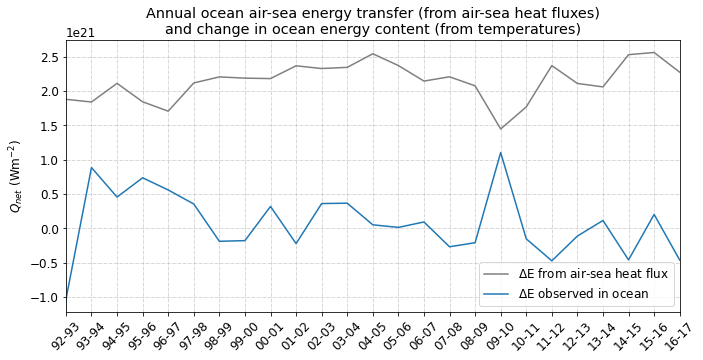

In [62]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

plt.plot(summer_temp_diff.start_year,energy_heat_flux,color='tab:gray',label="$\Delta$E from air-sea heat flux")
plt.plot(summer_temp_diff.start_year,energy_obs_ocean,color='tab:blue',label="$\Delta$E observed in ocean")

# ticks
year_span = []
for year in winter_heat.start_year:
    year_span.append(str(year)[-2:]+'-'+str(year+1)[-2:])

plt.margins(x=0)
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)",fontsize=12)
plt.xticks(ticks=winter_heat.start_year, labels=year_span, rotation=45)
plt.grid(linestyle='-.', linewidth=0.5)
plt.legend()
plt.title("Annual ocean air-sea energy transfer (from air-sea heat fluxes)\nand change in ocean energy content (from temperatures)")

plt.show()

The difference between $\Delta$E from air-sea heat flux and $\Delta$E from ocean observations will give us the energy supplied from ocean transport

In [74]:
energy_ocean_trans = energy_heat_flux - energy_obs_ocean

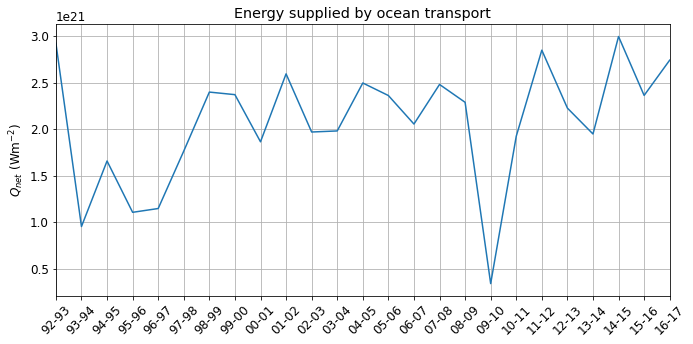

In [75]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

plt.plot(summer_temp_diff.start_year,energy_ocean_trans)
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)",fontsize=12)
plt.margins(x=0)
plt.xticks(ticks=winter_heat.start_year, labels=year_span, rotation=45)
plt.grid()
plt.title("Energy supplied by ocean transport");

Using 2010 as an example: this year had anomalously low air-sea heat fluxes, and high ocean temperatures. Energy resupplied by ocean transport was low relative to other years.

#### How do variations of annual-mean heat loss to the atmosphere compare with annual-mean heat gained by ocean transport?

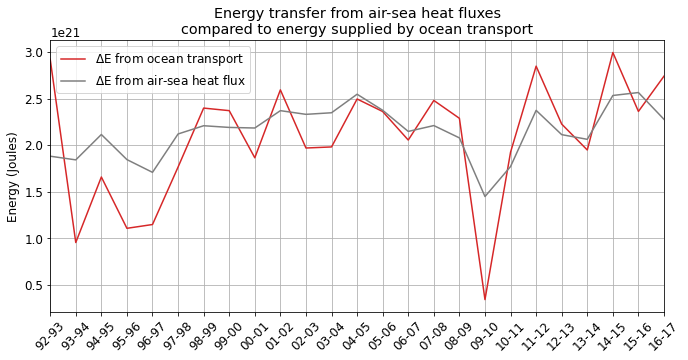

In [80]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

plt.plot(summer_temp_diff.start_year,energy_ocean_trans,color='tab:red',label="$\Delta$E from ocean transport")
plt.plot(summer_temp_diff.start_year,energy_heat_flux,color='tab:gray',label="$\Delta$E from air-sea heat flux")

plt.ylabel("Energy (Joules)",fontsize=12)
plt.margins(x=0)
plt.xticks(ticks=winter_heat.start_year, labels=year_span, rotation=45)
plt.grid()
plt.legend()
plt.title("Energy transfer from air-sea heat fluxes\ncompared to energy supplied by ocean transport");

Energy lost to the atmosphere closely compares with energy supplied by ocean transport. Generally, both are increasing overtime. When $\Delta$E from air-sea heat fluxes decreases (increases), $\Delta$E from ocean transport also decreases (increases).

***